In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


In [41]:
nine = pd.read_csv('911.csv')
nine.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015


In [4]:
nine.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'hour', 'month', 'day of week', 'Year'],
      dtype='object')

In [5]:
nine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115211 entries, 0 to 115210
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   lat          115211 non-null  float64
 1   lng          115211 non-null  float64
 2   desc         115211 non-null  object 
 3   zip          100789 non-null  float64
 4   title        115211 non-null  object 
 5   timeStamp    115211 non-null  object 
 6   twp          115177 non-null  object 
 7   addr         115211 non-null  object 
 8   e            115211 non-null  int64  
 9   Reason       115211 non-null  object 
 10  hour         115211 non-null  int64  
 11  month        115211 non-null  int64  
 12  day of week  115211 non-null  object 
 13  Year         115211 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 12.3+ MB


In [6]:
nine.describe()

,lat,lng,zip,e,hour,month,Year
count,115211.000000,115211.000000,100789.000000,115211.0,115211.000000,115211.000000,115211.000000
mean,40.159127,-75.317145,19237.423201,1.0,13.064759,5.539714,2015.931291
std,0.093297,0.170770,336.415922,0.0,5.662017,3.115296,0.252959
min,30.333596,-95.595595,17752.000000,1.0,0.000000,1.000000,2015.000000
25%,40.100234,-75.391998,19038.000000,1.0,9.000000,3.000000,2016.000000
50%,40.144526,-75.304780,19401.000000,1.0,13.000000,5.000000,2016.000000
75%,40.229008,-75.211866,19446.000000,1.0,17.000000,8.000000,2016.000000
max,41.167156,-74.995041,77316.000000,1.0,23.000000,12.000000,2016.000000


In [7]:
nine.nunique()

lat             15347
lng             15356
desc           115174
zip               104
title             117
timeStamp      111290
twp                68
addr            23470
e                   1
Reason              3
hour               24
month              11
day of week         7
Year                2
dtype: int64

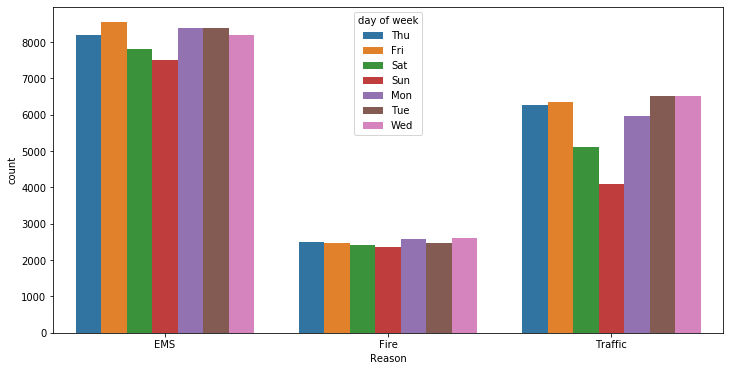

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=nine , x='Reason' , hue='day of week')

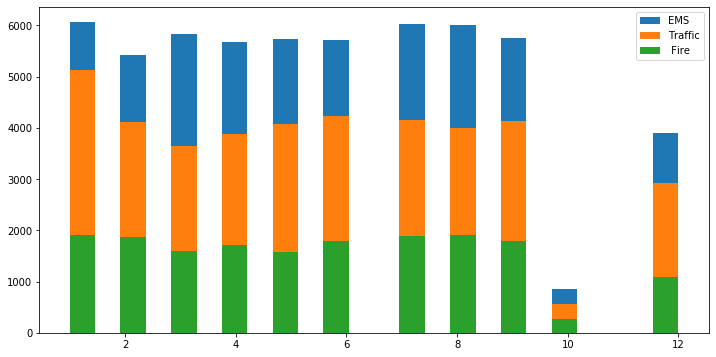

In [40]:
plt.figure(figsize=(12,6))
plt.hist(nine[nine['Reason'] == 'EMS']['month'] , bins= 24 , label = "1")
plt.hist(nine[nine['Reason'] == 'Traffic']['month'] , bins= 24 , label = "2")
plt.hist(nine[nine['Reason'] == 'Fire']['month'] , bins= 24 , label = "3" )
plt.legend(['EMS' , 'Traffic' ,' Fire' ])

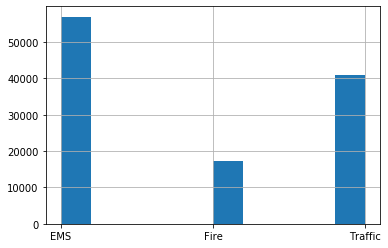

In [18]:
nine['Reason'].hist(bins = 10)

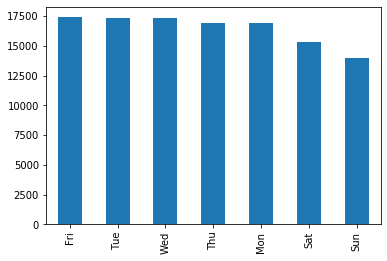

In [10]:


x = nine['day of week'].value_counts().plot(kind = 'bar')

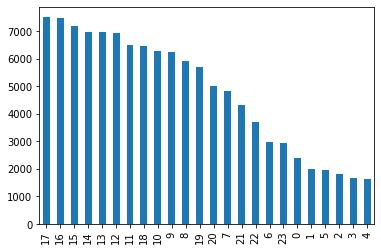

In [11]:
nine['hour'].value_counts().plot(kind = 'bar')

In [12]:


df1 = nine[(nine['Year'] == 2015) & (nine['Reason'] == 'EMS' )]
df1

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,15,12,Thu,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7908,40.148771,-75.085515,HUNTINGDON RD & MASONS MILL RD; UPPER MORELAN...,19006.0,EMS: FALL VICTIM,2015-12-31 23:24:06,UPPER MORELAND,HUNTINGDON RD & MASONS MILL RD,1,EMS,23,12,Thu,2015
7910,40.252593,-75.247293,BETHLEHEM PIKE; BUCKS COUNTY; Station 345; 20...,NaN,EMS: VEHICLE ACCIDENT,2015-12-31 23:41:52,BUCKS COUNTY,BETHLEHEM PIKE,1,EMS,23,12,Thu,2015
7912,40.136020,-75.354606,BEECH DR & SPRUCE ST; WEST NORRITON; Station ...,19403.0,EMS: SEIZURES,2015-12-31 23:44:56,WEST NORRITON,BEECH DR & SPRUCE ST,1,EMS,23,12,Thu,2015
7913,40.294817,-75.537972,BIG RD & COLONIAL RD; UPPER FREDERICK; Statio...,18074.0,EMS: FALL VICTIM,2015-12-31 23:54:02,UPPER FREDERICK,BIG RD & COLONIAL RD,1,EMS,23,12,Thu,2015


In [34]:
# مفيش حالات في شهر 11 او الداتا مسجلتش 
nine[nine['month'] == 11]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week,Year


In [13]:
nine['twp'].value_counts()

LOWER MERION     9912
ABINGTON         6949
NORRISTOWN       6782
UPPER MERION     6021
CHELTENHAM       5334
                 ... 
BRYN ATHYN        203
SALFORD           188
GREEN LANE         68
PHILA COUNTY       52
LEHIGH COUNTY      29
Name: twp, Length: 68, dtype: int64